In [507]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [508]:
train = pd.read_csv('/Users/huiyisang/Desktop/archive/train.csv',sep=";")

#train = pd.read_csv('https://raw.githubusercontent.com/qmdismnp/Schulich_DS_MBAN/refs/heads/main/train.csv?token=GHSAT0AAAAAACX2ZFBOUPYFUYCHGPBYXNASZXPEZFQ',sep=";")
#test = pd.read_csv('https://raw.githubusercontent.com/qmdismnp/Schulich_DS_MBAN/refs/heads/main/test.csv?token=GHSAT0AAAAAACX2ZFBO2UU6M7CODNOTO6FIZXPEY5A', sep=";")

In [509]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [510]:
# Combine the datasets
df = train

In [511]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Data Exploration

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [513]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [514]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [515]:
df[df['pdays'] > 500]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41797,46,management,married,tertiary,no,37378,yes,no,cellular,14,oct,146,1,518,1,failure,no
41992,52,services,married,secondary,no,992,yes,no,cellular,27,oct,424,1,515,1,failure,yes
42062,61,management,married,tertiary,no,477,yes,no,cellular,29,oct,377,1,520,1,other,yes
42161,55,blue-collar,married,secondary,no,12401,no,no,telephone,5,nov,111,9,511,4,other,no
42423,38,services,married,secondary,no,5000,no,no,cellular,4,dec,720,5,536,5,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45138,30,technician,single,secondary,no,500,yes,no,cellular,8,nov,176,1,543,3,failure,no
45146,49,unemployed,divorced,tertiary,no,780,no,no,cellular,8,nov,148,1,871,2,failure,no
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,yes


In [516]:
df[df['balance'] == 102127]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no


In [517]:
df[df['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


In [518]:
df[df['duration'] == 4918]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no


In [519]:
df[df['previous'] > 60]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [520]:
#change the outliers due to the possible manual entry error
df['previous'] = df['previous'].replace(275,27)

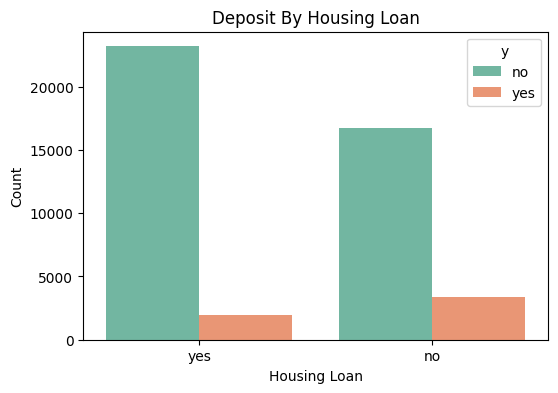

In [521]:
# Plot the distribution of the target variable 'deposit'
plt.figure(figsize=(6, 4))
sns.countplot(x='housing', hue='y', data=df, palette='Set2')
plt.title('Deposit By Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

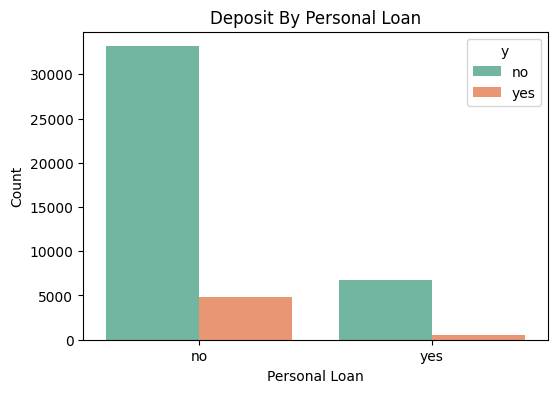

In [522]:
# Plot the distribution of the target variable 'deposit'
plt.figure(figsize=(6, 4))
sns.countplot(x='loan', hue='y', data=df, palette='Set2')
plt.title('Deposit By Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

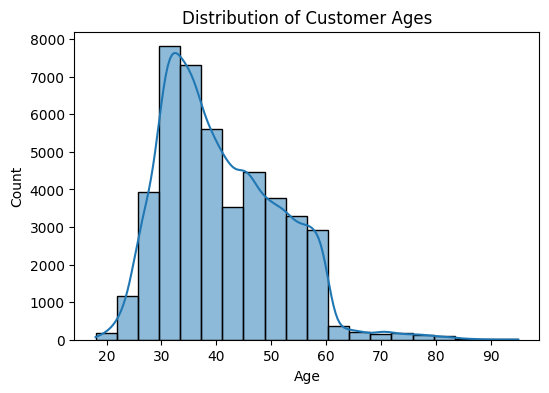

In [523]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

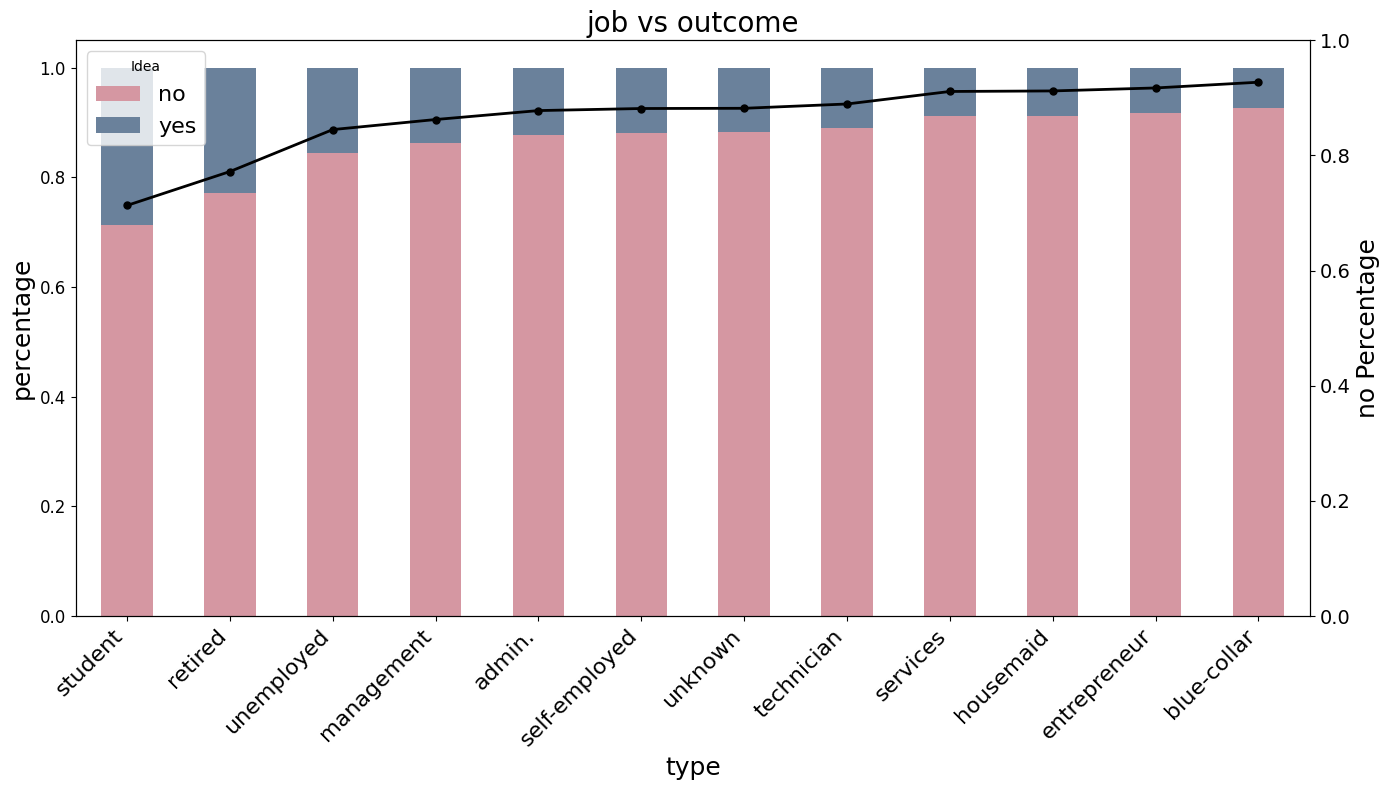

In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for Good idea and Bad idea
def plot_stacked_bar_chart(x, title, xlabel, ylabel):
    # Count the count of Good and Bad ideas in each category
    idea_counts = df.groupby([x, 'y']).size().unstack().fillna(0)
    
    # Calculate the total for each category
    total_counts = idea_counts.sum(axis=1)
    
    # Calculate the proportion of Good and Bad ideas in each category
    idea_percentage = idea_counts.div(total_counts, axis=0)
    
    # Sort in order of the proportion of Bad ideas
    idea_percentage = idea_percentage.sort_values(by='no')
    
    # Draw a stacked bar chart
    ax = idea_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#D597A2', '#6A819B'])  
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=12)
    plt.legend(title='Idea', fontsize=16)
    
    # Add a curve to describe the proportion of bad ideas
    bad_idea_percentage = idea_percentage['no'].values
    ax2 = ax.twinx()
    ax2.plot(range(len(bad_idea_percentage)), bad_idea_percentage, color='black', marker='o', linestyle='-', linewidth=2, markersize=5)
    ax2.set_ylim(0, 1)
    ax2.set_ylabel('no Percentage', fontsize=18)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Draw a stacked bar chart for F_PARTYLN_FINAL
plot_stacked_bar_chart('job', 'job vs outcome', 'type', 'percentage')


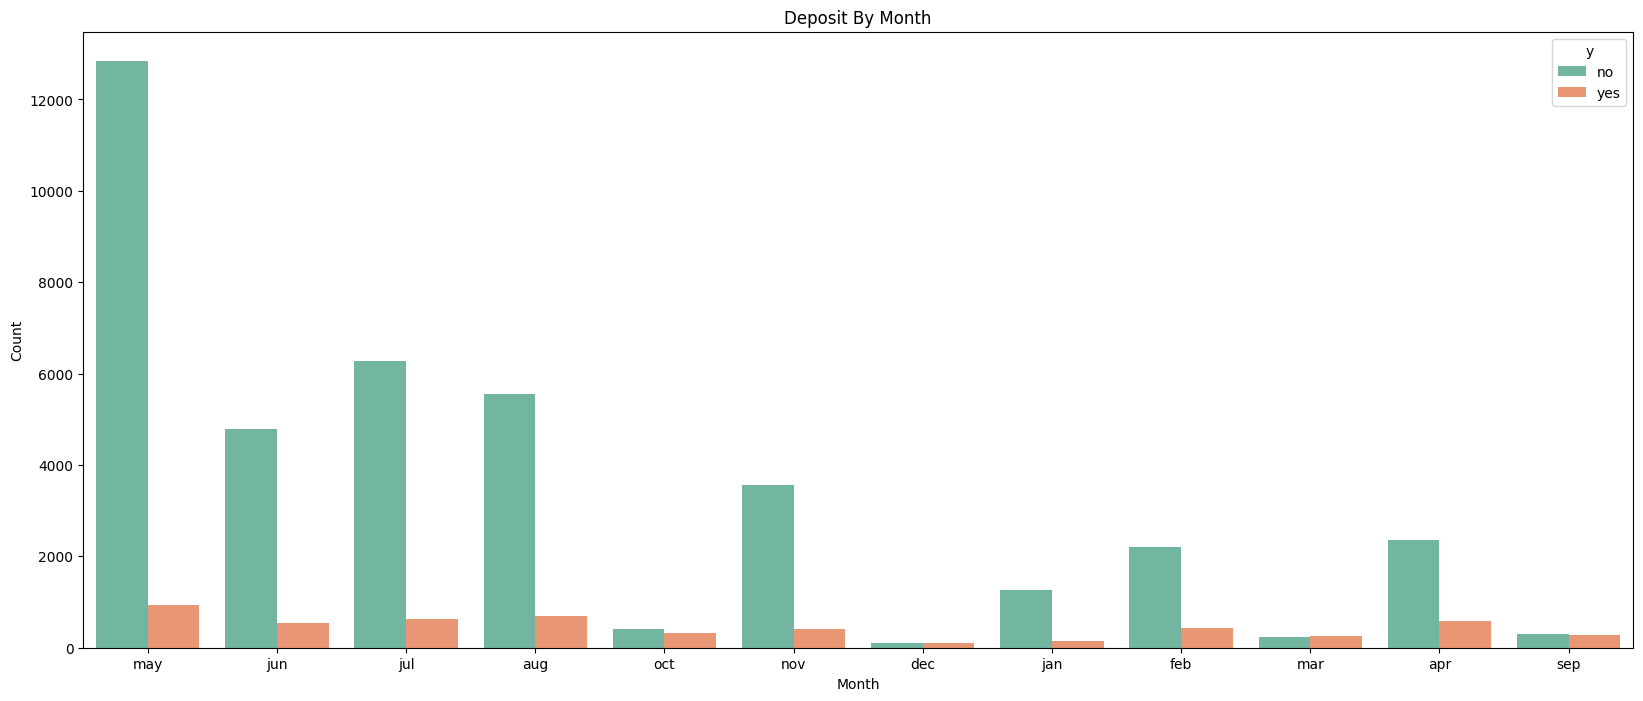

In [525]:
plt.figure(figsize=(20, 8))
sns.countplot(x='month', hue='y',data=df, palette='Set2')
plt.title('Deposit By Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

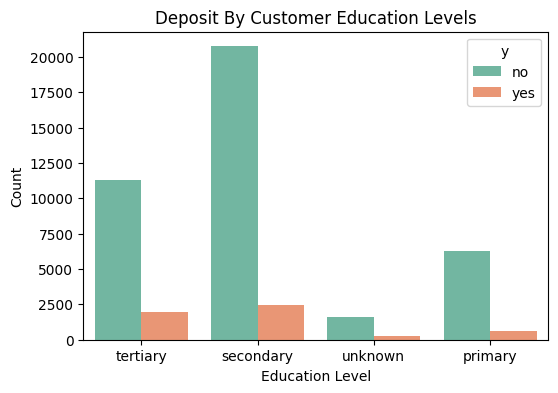

In [526]:
plt.figure(figsize=(6, 4))
sns.countplot(x='education', hue='y',data=df, palette='Set2')
plt.title('Deposit By Customer Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

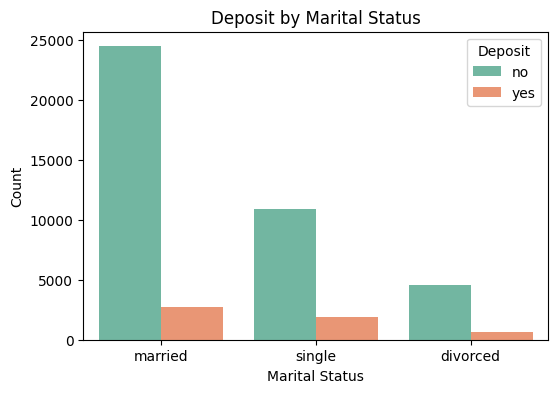

In [527]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='y', data=df, palette='Set2')
plt.title('Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

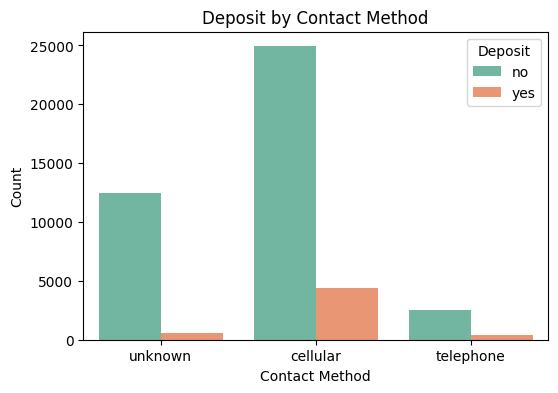

In [528]:
plt.figure(figsize=(6, 4))
sns.countplot(x='contact', hue='y', data=df, palette='Set2')
plt.title('Deposit by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

In [529]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='y', ylabel='previous'>

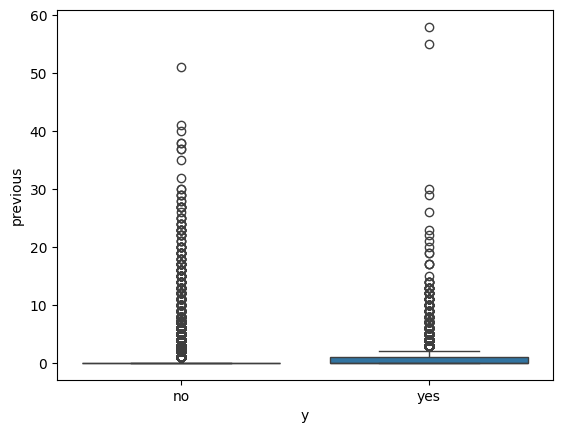

In [530]:
sns.boxplot(x='y', y='previous', data=df)

<Axes: xlabel='y', ylabel='pdays'>

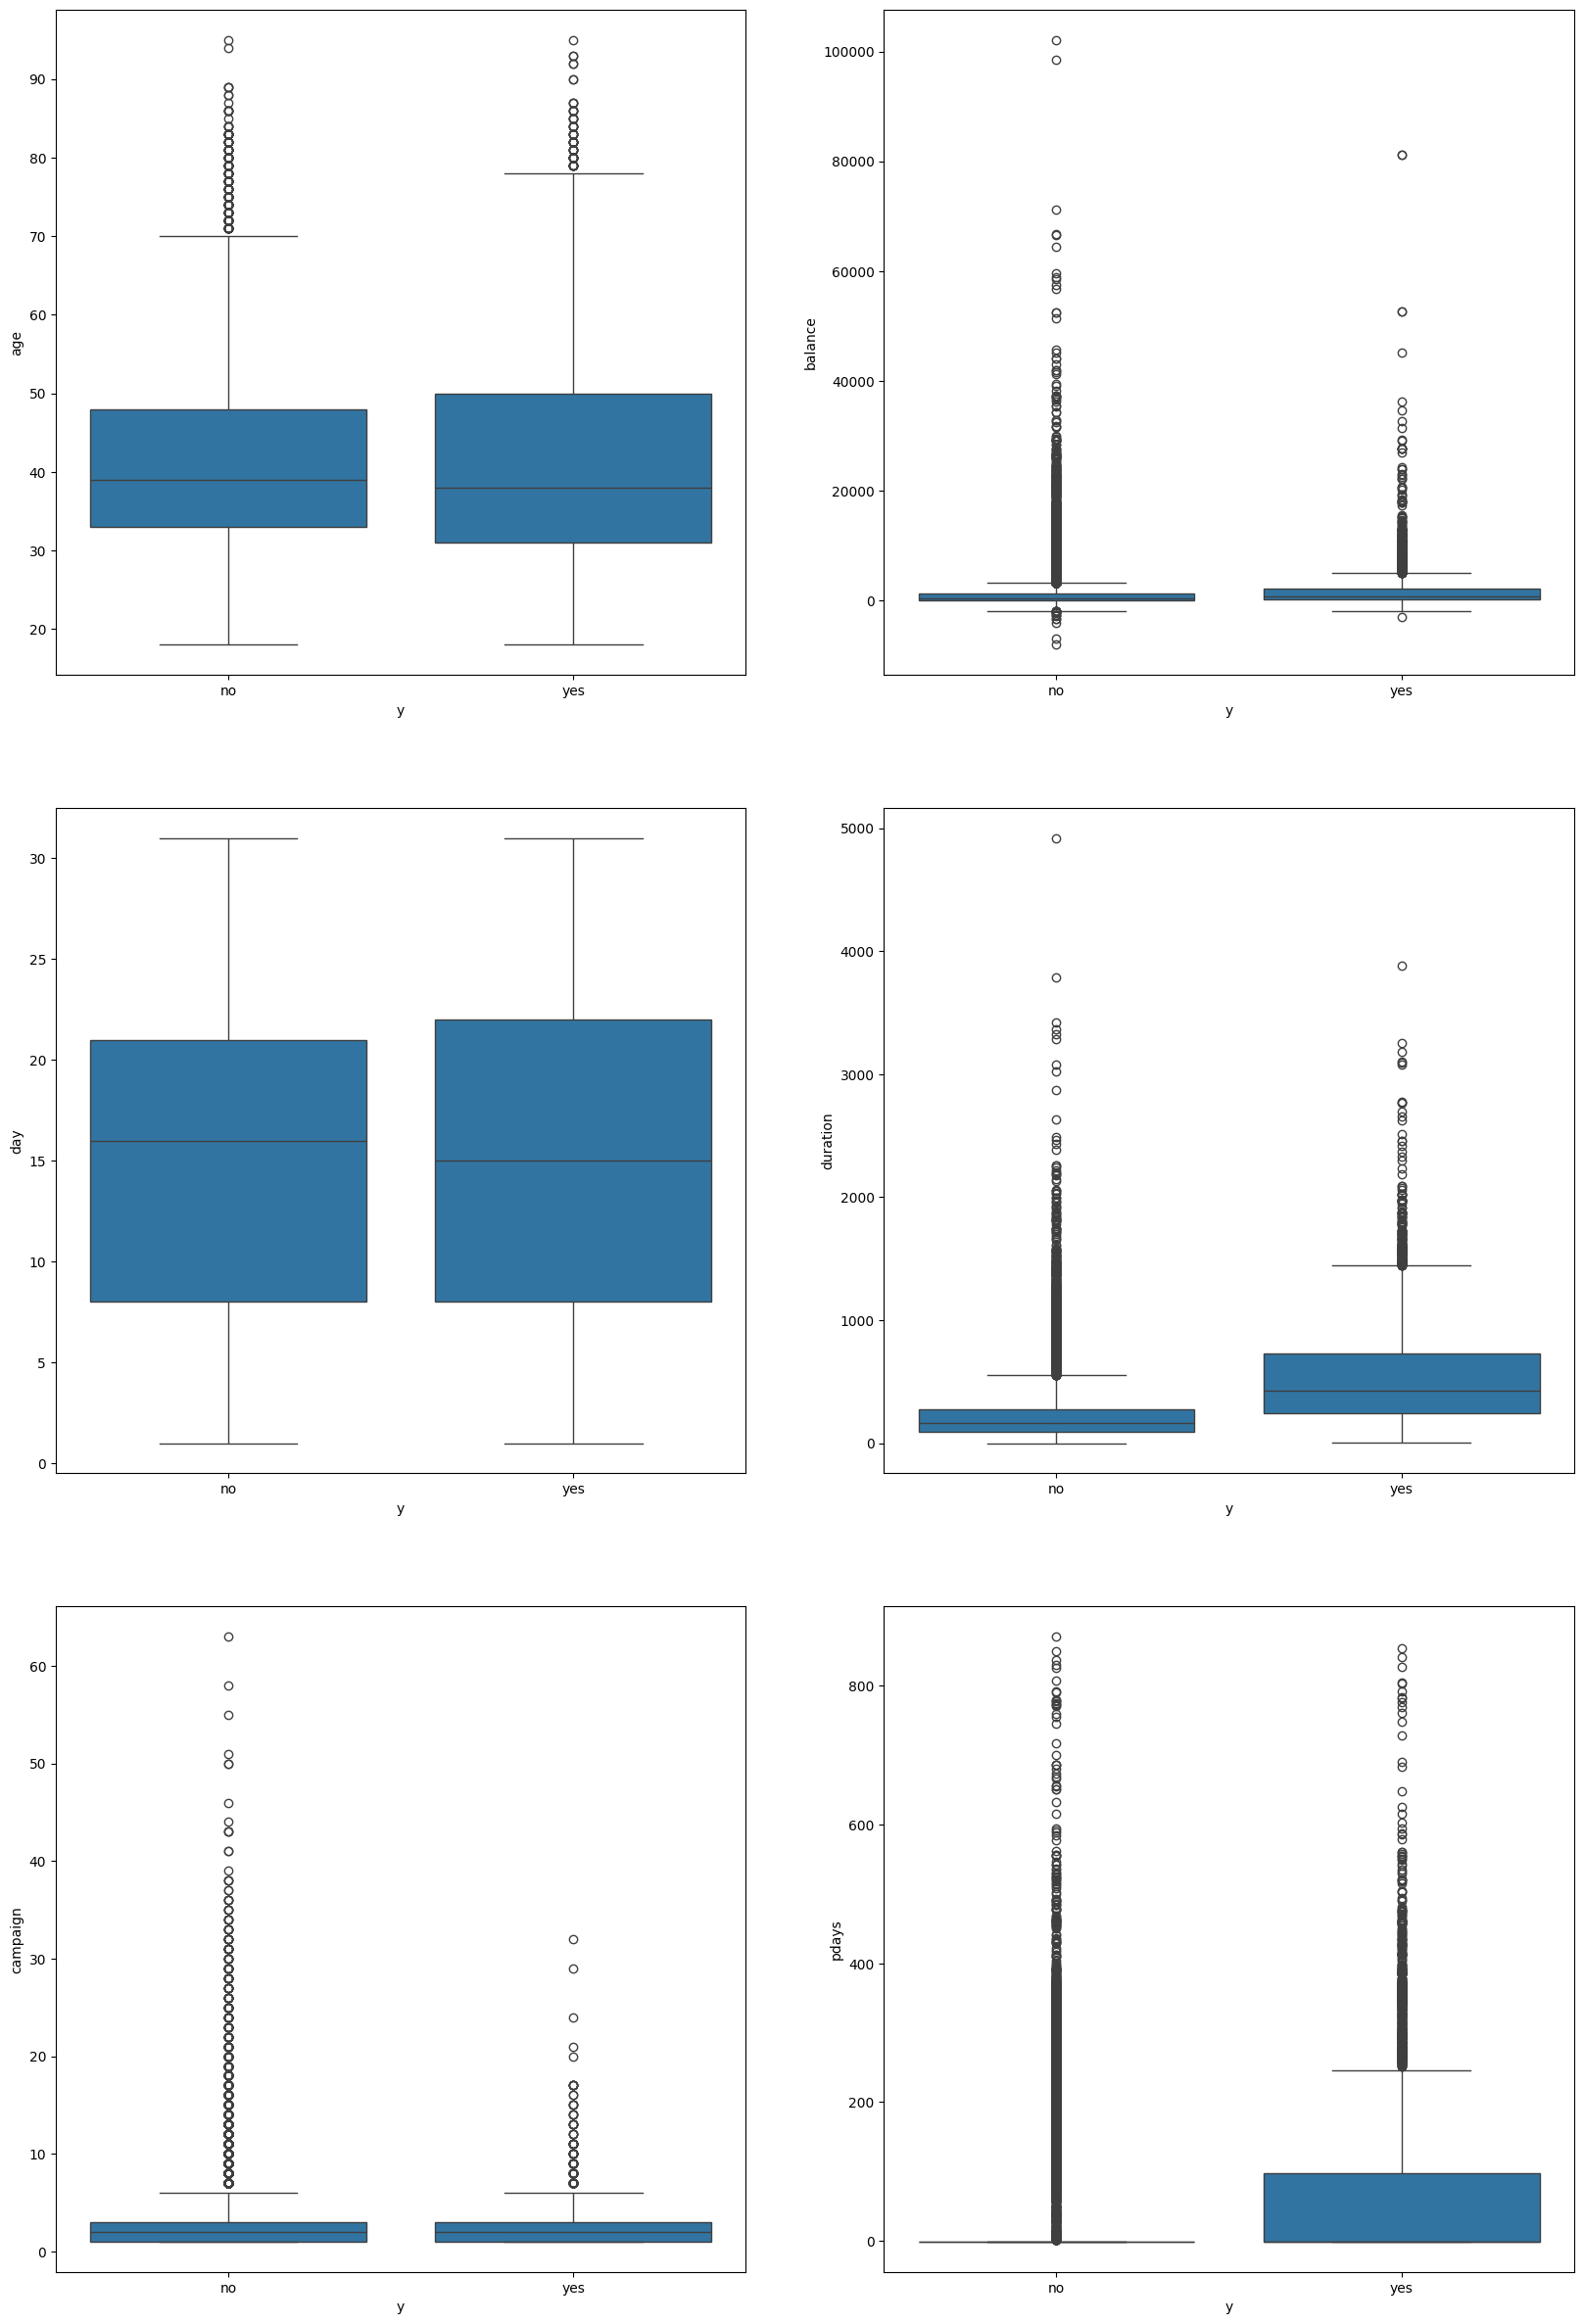

In [531]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(20,30))

sns.boxplot(x='y', y='age', data=df, ax=ax1)
sns.boxplot(x='y', y='balance', data=df, ax=ax2)
sns.boxplot(x='y', y='day', data=df, ax=ax3)
sns.boxplot(x='y', y='duration', data=df, ax=ax4)
sns.boxplot(x='y', y='campaign', data=df, ax=ax5)
sns.boxplot(x='y', y='pdays', data=df, ax=ax6)

In [532]:
df1 = df.copy()
df1['y'] = df1['y'].replace({"yes": 1 , "no": 0})
numeric_data = df1.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_60846/2193406022.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['y'] = df1['y'].replace({"yes": 1 , "no": 0})


,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001805,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.020860,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.057539,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.000437,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.038875,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.541593,0.103621
previous,0.001805,0.020860,-0.057539,0.000437,-0.038875,0.541593,1.000000,0.113371
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.113371,1.000000


In [533]:
from scipy.stats import chi2_contingency

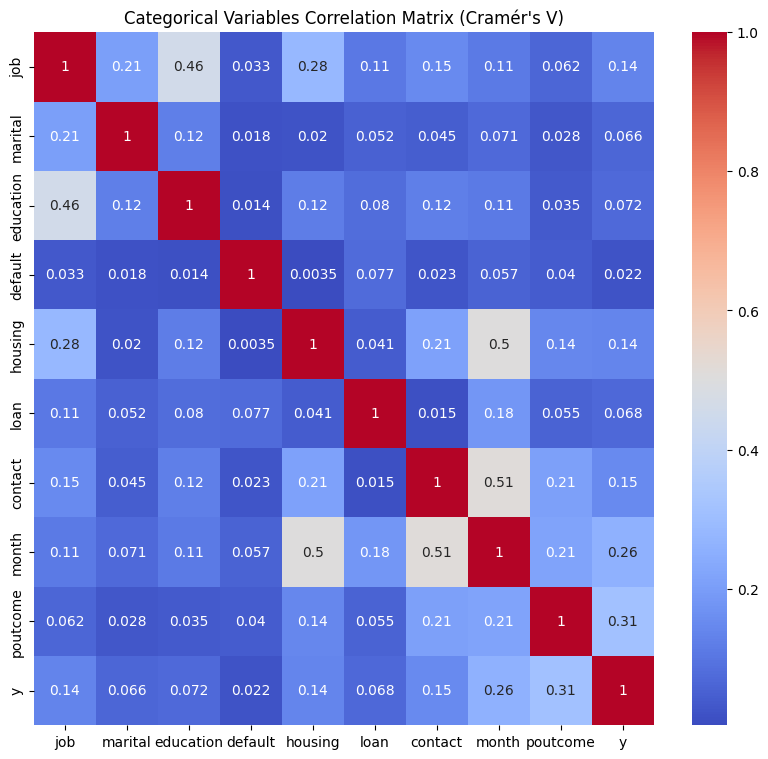

In [534]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V for the given confusion matrix."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # Get total number of observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1) if n > 1 else 0)
    rcorr = r - ((r-1)**2)/(n-1) if n > 1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n > 1 else k
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select the categorical variables that you want to analyze
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

# Clean data to remove missing values
clean_df = df.dropna(subset=categorical_cols)

# Clean data to remove missing values
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(clean_df[col1], clean_df[col2])
            corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the data type to floating-point
corr_matrix = corr_matrix.astype(float)

# Visual correlation matrix
plt.figure(figsize=(10, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Categorical Variables Correlation Matrix (Cramér\'s V)')
plt.show()

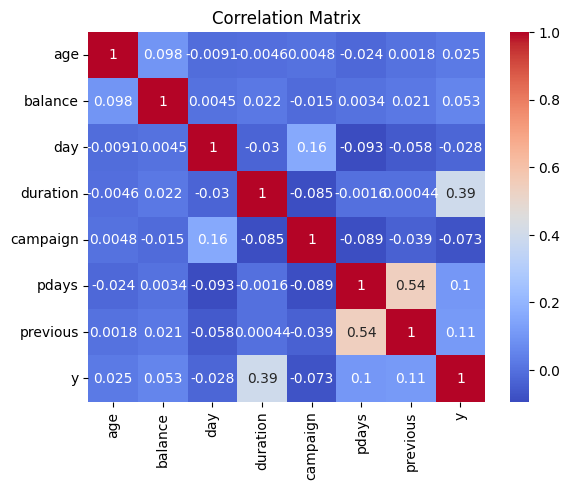

In [535]:
# Create the heatmap for num data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [536]:
#cat - job,housing,contact,poutcome,
# 
# num - balance,duration,campaign,pdays,previous

Summary:

The training dataset served as the primary data frame for examining missing values and outliers.

Cleaning and Exploration Stage:

1.	The dataset was relatively clean, with no missing values, and the data types matched the variable definitions. Outliers were present in the dataset. Upon checking extreme values in the ‘previous’ column, one instance showed a value of 275, which was significantly larger compared to the mean of 0.576892 and a median of 0 for this variable. This customer had received only two contacts for this campaign, making the 275 entries in the ‘previous’ column unreasonable. As a result, the outlier was manually adjusted from 275 to 27. By investigating other variables, we believe that outliers offer valuable insights that could enhance the model’s learning process.

2.	Bar charts were used to visualize categorical input variables, while box plots were utilized for numerical variables. Through this analysis, it was found that ‘balance,’ ‘previous,’ and ‘duration’ (numerical variables) were strongly correlated with the outcome ‘y’. Among the categorical variables, ‘job,’ ‘housing,’ and ‘contact’ seemed to influence the customers’ decision on purchasing the deposit.

3.	Furthermore, two heatmaps (for categorical and numerical variables) were generated to illustrate the correlation between input variables and the output. Based on the correlations, ‘job,’ ‘housing,’ ‘contact,’ and ‘poutcome’ were selected as part of the categorical inputs, while ‘balance,’ ‘duration,’ ‘campaign,’ ‘pdays,’ and ‘previous’ were chosen as the numerical inputs for building the logistic model (LM).

Build pipline

In [537]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import classification_report,f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix


In [538]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [539]:
df1['y'].value_counts()/len(df1)

y
0    0.883015
1    0.116985
Name: count, dtype: float64

In [540]:
X = df1.drop(columns=['y'])
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [541]:

numeric_columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']
#cat - job,housing,contact,poutcome,
categorical_columns =['job','housing','contact','poutcome']

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

In [543]:
# create a pre-processing pipeline which includes the steps of Scaling numeric variables and encoding categoricals

preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)

In [544]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(class_weight='balanced')

Preprocessing and Transformation:

1. Since the outcome variable was binary (‘yes’ or ‘no’), the ‘y’ column was firstly updated, assigning 0 for ‘no’ (did not purchase the deposit) and 1 for ‘yes’ (purchased the deposit).

2. The preprocessing step involved two transformations, as the dataset contained both numerical and categorical inputs. The first transformation applied the MinMaxScaler to standardize the numerical features. The second transformation used the OneHotEncoder for the categorical variables selected.

In [545]:
#using resamplying for KNN only
# Get the indices of the categorical features from the DataFrame
categorical_features_indices = [X_train.columns.get_loc(c) for c in categorical_columns]

# Define SMOTENC for both categorical and numeric data
smote = SMOTENC(categorical_features=categorical_features_indices,random_state=42)

# Combine the preprocessor and the model in a pipeline
model_pipeline_knn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),  # Apply SMOTE after preprocessing
    ('classifier', KNeighborsClassifier())
])

In [546]:
#build pipline
pipeline_log = Pipeline(steps=
                   [
                       ('preprocessor',preprocessor),
                       ('classifier',logreg)
                   ])

In [547]:
knn_scores = cross_val_score(model_pipeline_knn, X_train, y_train, scoring='f1', cv=5)

In [548]:
logreg_scores = cross_val_score(pipeline_log, X_train, y_train, scoring='f1', cv=5)

In [549]:
print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')

Logistic Regression Mean F1 Score: 0.5201603513153075
K-Nearest Neighbors Mean F1 Score: 0.4436977755246982


In [550]:
log1 = pipeline_log.fit(X_train,y_train)
knn1 = model_pipeline_knn.fit(X_train,y_train)

pred_log1 = log1.predict(X_test)
proba_log1 = log1.predict_proba(X_test)[:, 1]

pred_knn1 = knn1.predict(X_test)
proba_knn1 = knn1.predict_proba(X_test)[:, 1]

In [551]:
print(f'Logistic Regression Accuracy Score: {accuracy_score(y_test, pred_log1)}')
print(f'Logistic Regression F1 Score: {f1_score(y_test, pred_log1)}')
print(f'Logistic Regression Precision Score: {precision_score(y_test, pred_log1)}')
print(f'Logistic Regression Recall Score: {recall_score(y_test, pred_log1)}')

print(f'K-Nearest Neighbors Accuracy Score:  {accuracy_score(y_test, pred_knn1)}')
print(f'K-Nearest Neighbors F1 Score:  {f1_score(y_test, pred_knn1)}')
print(f'K-Nearest Neighbors Precision Score:  {precision_score(y_test, pred_knn1)}')
print(f'K-Nearest Neighbors Recall Score:  {recall_score(y_test, pred_knn1)}')

Logistic Regression Accuracy Score: 0.8259427181245163
Logistic Regression F1 Score: 0.5189486552567237
Logistic Regression Precision Score: 0.3892709766162311
Logistic Regression Recall Score: 0.7781851512373968
K-Nearest Neighbors Accuracy Score:  0.8001769324339268
K-Nearest Neighbors F1 Score:  0.4604359510301583
K-Nearest Neighbors Precision Score:  0.34145261293179807
K-Nearest Neighbors Recall Score:  0.7066911090742438


Logistic Regression ROC-AUC Score: 0.8865435970543702
KNN ROC-AUC Score: 0.8141314661571629


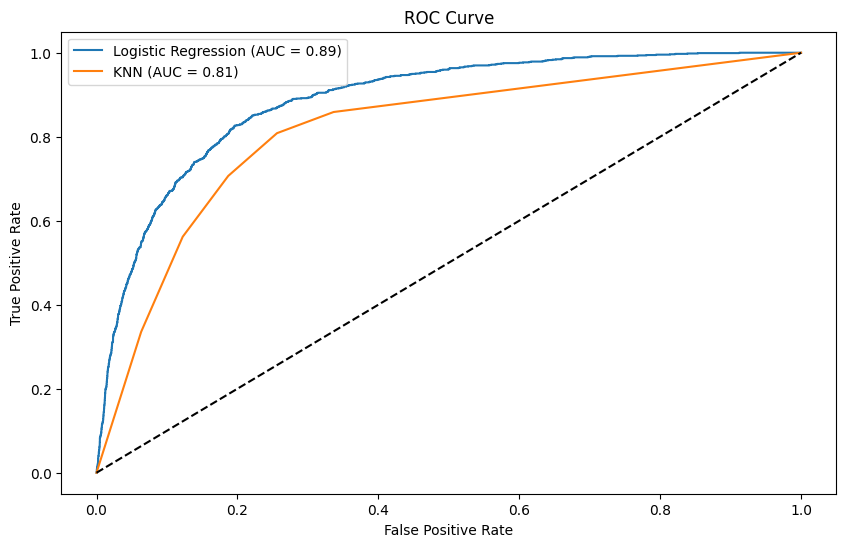

In [552]:
#Compute ROC-AUC Scores
roc_auc_log = roc_auc_score(y_test, proba_log1)
roc_auc_knn = roc_auc_score(y_test, proba_knn1)

print("Logistic Regression ROC-AUC Score:", roc_auc_log)
print("KNN ROC-AUC Score:", roc_auc_knn)

# Step 3: Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, proba_log1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, proba_knn1)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

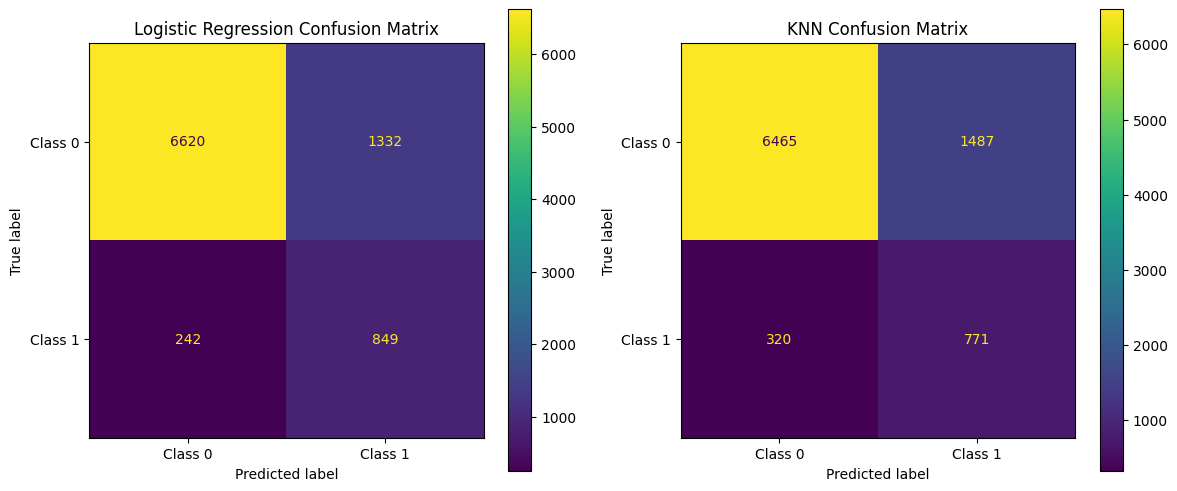

In [553]:
#Confusion Matrix
cm_log = confusion_matrix(y_test, pred_log1)
cm_knn = confusion_matrix(y_test, pred_knn1)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay(cm_log, display_labels=["Class 0", "Class 1"]).plot(ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')

ConfusionMatrixDisplay(cm_knn, display_labels=["Class 0", "Class 1"]).plot(ax=ax[1])
ax[1].set_title('KNN Confusion Matrix')

plt.show()

Pipeline and Modeling:

1. The original training and testing datasets were used in the modeling process. Additionally, selected variables were extracted from the dataset to serve as inputs.

2. Due to the highly imbalanced dataset, where 88.3% of the outcomes were ‘no’ and 11.7% were ‘yes,’ a resampling technique (SMOTE) was incorporated into the K-Nearest Neighbors (KNN) model as part of the pipeline. The pipeline for the KNN model consisted of three steps: preprocessing, SMOTE, and the KNeighborsClassifier. For the Logistic Regression model, the class weights were balanced to address the minority class, and its pipeline only included the preprocessor and the Logistic Regression model itself.

3. After training the models, the Logistic Regression model outperformed the KNN model, yielding an accuracy of 82.59%, an F1 score of 51.89%, precision of 38.92%, and recall of 77.81%. Since the dataset has imbalanced outputs, the accuracy score could be less valuable in measuring performance. Despite of that, other metrics still reach higher scores across the board compared to the KNN model’s performance.

4. Additionally, the ROC curve and confusion matrix further confirmed that the Logistic Regression model was better, showing a higher AUC score and fewer Type I and Type II errors.

Hyperprameter Tuning

In [554]:
log_param_grid = {
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['liblinear', 'saga']  # Solver
}

In [555]:
knn_param_grid = {
    'classifier__n_neighbors': [20,25,30,35,40],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Weight function
    'classifier__metric': ['euclidean', 'manhattan'],  # Distance metric
}

In [556]:
from sklearn.model_selection import GridSearchCV

In [557]:
# Set up GridSearchCV for each model
logreg_gs = GridSearchCV(pipeline_log, param_grid=log_param_grid, scoring='f1', cv=5)


In [558]:
# Fit GridSearchCV to the data
logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['balance',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'housing',
                                                                          'contact',
                                                                          'poutcome'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='f1')

In [559]:
knn_gs = GridSearchCV(model_pipeline_knn, param_grid=knn_param_grid, scoring='f1', cv=5)

In [560]:
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['balance',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'housing',
                                                                          'contact',
                                                                          'poutcome'])])),
                                       ('smote',
                                        SMOTENC(categorical_features=[1, 6, 8,
                                                                      15],
                                                random_state=42)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [20, 25, 30, 35, 40],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

In [561]:
# Get the best models
best_logreg = logreg_gs.best_estimator_
best_knn = knn_gs.best_estimator_

# Print the best parameters for each model
print(f'Best Logistic Regression parameters: {logreg_gs.best_params_}')
print(f'Best K-Nearest Neighbors parameters: {knn_gs.best_params_}')

Best Logistic Regression parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best K-Nearest Neighbors parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 30, 'classifier__weights': 'distance'}


In [562]:
# Predict on the test set with the best models
y_pred_logreg = best_logreg.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

y_pred_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]
y_pred_prob_knn = best_knn.predict_proba(X_test)[:, 1]

In [563]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc

In [564]:
# Logistic Regression
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix")
print(confusion_matrix(y_test, y_pred_logreg))
print(f'Logistic Regression Accuracy Score: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression Precision Score: {precision_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression Recall Score: {recall_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression F1 Score: {f1_score(y_test, y_pred_logreg)}')


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7952
           1       0.39      0.78      0.52      1091

    accuracy                           0.83      9043
   macro avg       0.68      0.81      0.71      9043
weighted avg       0.90      0.83      0.85      9043

Logistic Regression Confusion Matrix
[[6622 1330]
 [ 240  851]]
Logistic Regression Accuracy Score: 0.8263850492093332
Logistic Regression Precision Score: 0.3901879871618524
Logistic Regression Recall Score: 0.7800183318056828
Logistic Regression F1 Score: 0.5201711491442543


In [565]:

# K-Nearest Neighbors
print("\nK-Nearest Neighbors Classification Report")
print(classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))
print(f'K-Nearest Neighbors Accuracy Score: {accuracy_score(y_test, y_pred_knn)}')
print(f'K-Nearest Neighbors Precision Score: {precision_score(y_test, y_pred_knn)}')
print(f'K-Nearest Neighbors Recall Score: {recall_score(y_test, y_pred_knn)}')
print(f'K-Nearest Neighbors F1 Score: {f1_score(y_test, y_pred_knn)}')


K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.96      0.80      0.88      7952
           1       0.35      0.78      0.48      1091

    accuracy                           0.80      9043
   macro avg       0.66      0.79      0.68      9043
weighted avg       0.89      0.80      0.83      9043

K-Nearest Neighbors Confusion Matrix
[[6384 1568]
 [ 240  851]]
K-Nearest Neighbors Accuracy Score: 0.8000663496627225
K-Nearest Neighbors Precision Score: 0.35179826374534934
K-Nearest Neighbors Recall Score: 0.7800183318056828
K-Nearest Neighbors F1 Score: 0.4849002849002849


Hyperparameter Tuning:

Both the Logistic Regression and KNN models were tuned for a fair evaluation using grid search on three parameters. However, after applying the best parameters, neither model showed significant improvements in their metrics. Despite this, the Logistic Regression model continued to demonstrate better performance than the KNN model.

### PART 3 & PART 4

In [566]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [567]:
knn_model = KNeighborsClassifier(weights='distance')
dt = DecisionTreeClassifier(class_weight='balanced',max_depth=8)
rf = RandomForestClassifier(class_weight='balanced',max_depth=8)
ada = AdaBoostClassifier(algorithm='SAMME')
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', logreg), ('knn', knn_model), ('dt', dt)])

In [568]:
classifiers = {
    'K-Nearest Neighbors': knn_model,
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [569]:
results = {}
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()

    # Check if the classifier is AdaBoost to include SMOTE
    if name == 'AdaBoost' or 'Bagging':
        # Add SMOTE for AdaBoost classifier
        pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                   ('smote', smote),
                                   ('classifier', clf)])
    else:    # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.345768  0.662695  0.454431  0.808028  3.195081
Logistic Regression   0.387404  0.783685  0.518496  0.824395  2.864804
Decision Tree         0.350690  0.814849  0.490347  0.795643  2.787745
Random Forest         0.358132  0.829514  0.500276  0.800066  4.477091
AdaBoost              0.366438  0.784601  0.499562  0.810351  3.667841
Bagging               0.399734  0.551787  0.463612  0.845958  4.154882
Voting                0.386121  0.795600  0.519916  0.822736  3.149942


In [573]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import time
import pandas as pd

# Hyperparameter grids for tuning
knn_params = {    
    'classifier__n_neighbors': [20,25,30,35,40],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Weight function
    'classifier__metric': ['euclidean', 'manhattan'],
}
log_reg_params = {
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['liblinear', 'saga'],
}
dt_params = {
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}
rf_params = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_samples': [0.5, 0.7, 1.0],
    'classifier__max_features': [0.5, 1.0],
}
ada_params = {
    'classifier__n_estimators': [25, 50, 75, 100],
}
bag_params = {
    'classifier__n_estimators': [5, 10, 20, 50],
    'classifier__max_samples': [0.5, 0.7, 1.0],
}
voting_params = {'classifier__voting': ['hard', 'soft']}


params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create a pipeline and include SMOTE for specific models
    if name in ['AdaBoost', 'Bagging']:
        pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                      ('smote', smote),
                                      ('classifier', clf)])4
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Store best estimator and evaluation metrics
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Estimator': best_model,
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                                                        Best Estimator  \
K-Nearest Neighbors  (ColumnTransformer(transformers=[('num', MinMa...   
Logistic Regression  (ColumnTransformer(transformers=[('num', MinMa...   
Decision Tree        (ColumnTransformer(transformers=[('num', MinMa...   
Random Forest        (ColumnTransformer(transformers=[('num', MinMa...   
AdaBoost             (ColumnTransformer(transformers=[('num', MinMa...   
Bagging              (ColumnTransformer(transformers=[('num', MinMa...   
Voting               (ColumnTransformer(transformers=[('num', MinMa...   

                                                           Best Params  \
K-Nearest Neighbors  {'classifier__metric': 'manhattan', 'classifie...   
Logistic Regression  {'classifier__C': 0.01, 'classifier__penalty':...   
Decision Tree        {'classifier__min_samples_leaf': 1, 'classifie...   
Random Forest        {'classifier__max_features': 0.5, 'classifier_...   
AdaBoost                             

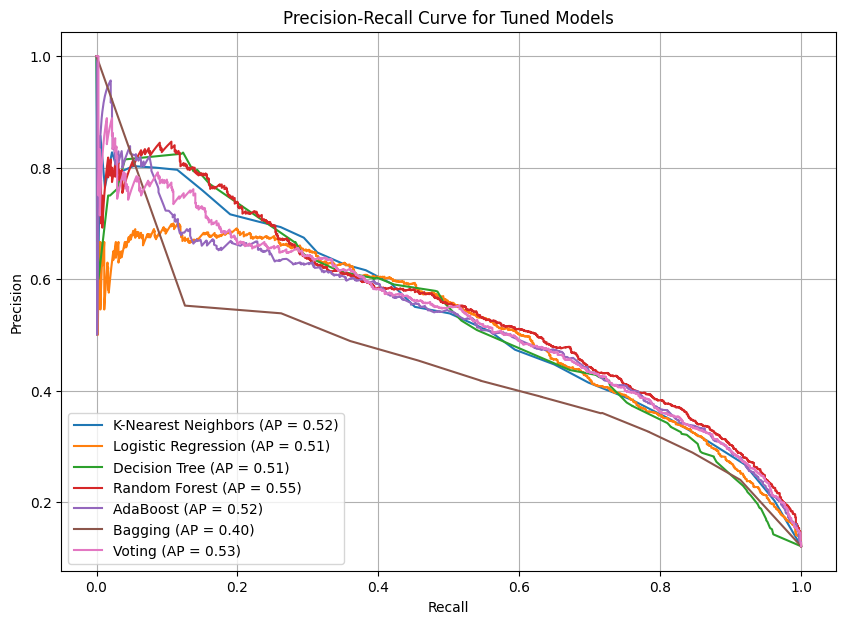

In [574]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Initialize a plot
plt.figure(figsize=(10, 7))

# Loop through classifiers and generate the Precision-Recall curve
for name, result in tuned_results.items():
    best_model = result['Best Estimator']

    # Use predict_proba or decision_function depending on the classifier
    if hasattr(best_model.named_steps['classifier'], 'predict_proba'):
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Positive class probabilities
    elif hasattr(best_model.named_steps['classifier'], 'decision_function'):
        y_pred_prob = best_model.decision_function(X_test)
    else:
        raise ValueError(f"{name} does not have 'predict_proba' or 'decision_function'")
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    
    # Compute average precision (AP) score
    avg_precision = average_precision_score(y_test, y_pred_prob)
    
    # Plot the Precision-Recall curve
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

# Plot formatting
plt.title('Precision-Recall Curve for Tuned Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()

# Show plot
plt.show()

K-Nearest Neighbors (KNN)
Precision: 0.674, Recall: 0.2942, F1-Score: 0.4097, Accuracy: 0.8977, Time: 38.37s

Logistic Regression
Precision: 0.3920, Recall: 0.7489, F1-Score: 0.5146, Accuracy: 0.8296, Time: 43.65s

Decision Tree
Precision: 0.3355, Recall: 0.8148, F1-Score: 0.4753, Accuracy: 0.7829, Time: 3.07s 

Random Forest
Precision: 0.3712, Recall: 0.8213, F1-Score: 0.5113, Accuracy: 0.8106, Time: 92.4s

AdaBoost
Precision: 0.3869, Recall: 0.7764, F1-Score: 0.5164, Accuracy: 0.8246, Time: 66.72s

Bagging
Precision: 0.4175, Recall: 0.5454, F1-Score: 0.4730, Accuracy: 0.8534, Time: 234.26s

Voting
Precision: 0.4512, Recall: 0.6774, F1-Score: 0.5416, Accuracy: 0.8617, Time: 2.77s

--------

KNN has the highest precision but very poor recall, resulting in a low F1-Score. It’s one of the slower models but provides decent accuracy.

Logistic Regression has a balance between precision and recall, yielding a good F1-Score and accuracy. It's fairly time-efficient compared to others.

Decision Tree offers high recall but lower precision and accuracy. However, it's the fastest model to run, which might be advantageous in time-sensitive applications.

Random Forest provides a good balance between precision, recall, and F1-Score but is quite slow compared to some alternatives. 

AdaBoost achieves the best F1-Score and offers competitive accuracy. Its time efficiency is acceptable but slower than some alternatives.

Bagging achieves good precision and accuracy but is by far the slowest model.

Voting provides an excellent balance of precision, recall, and accuracy with the shortest runtime, making it the most efficient choice overall.

Summary:
Voting stands out for its very good balance of performance metrics and being the fastest model to run.
Logistic Regression and AdaBoost also perform well, with AdaBoost having the best F1-Score and Logistic Regression being more time-efficient
KNN and Bagging are less favorable due to their high time costs compared to their performance metrics.


### Part 5

1. Why did the ensemble models perform the way they did?

Random Forest:

Random Forest is an ensemble of decision trees, and its strength lies in reducing the variance seen in a single decision tree. This explains its balanced performance in both precision (0.3712) and recall (0.8170). By averaging multiple decision trees, Random Forest generalizes well across different subsets of the data, making it less prone to overfitting compared to individual trees.
The model’s high accuracy (0.8106) and F1-score (0.5071) reflect its ability to capture both positive cases and reduce false positives, achieving strong generalization. Random Forest performs particularly well when the data has complex relationships between features or when features are highly correlated.

Was This Expected? Yes, Random Forest typically performs well in scenarios with complex feature interactions. The model’s ability to balance precision and recall while reducing overfitting was expected.


AdaBoost:

AdaBoost works by giving more weight to misclassified instances during training, which helps it improve the performance of weak learners. The model’s precision (0.3869) was higher than Random Forest, but its recall (0.7764) was slightly lower. This reflects the model’s focus on correcting misclassifications, leading to better precision but sometimes at the expense of missing some easier positive cases.
The F1-score (0.5146) and accuracy (0.8246) show that AdaBoost was effective overall but may have been affected by noise in the data, as boosting models can overfit when they focus too heavily on hard-to-classify instances.

Was This Expected? Yes, AdaBoost typically excels in precision but can sometimes underperform in recall due to its sensitivity to noisy data. The results are consistent with the model’s behavior, showing its strength in correcting errors and boosting weak learners.


Bagging Classifier:

Bagging, like Random Forest, reduces variance by averaging multiple models trained on bootstrapped samples. It achieved the highest precision (0.4175), meaning it minimized false positives more effectively than the other models. However, its recall (0.5454) was lower, reflecting a more conservative approach to classifying positive cases.
Bagging’s accuracy (0.8534) was the highest among the ensemble methods, but its lower recall suggests that it might have missed a substantial portion of positive instances. Bagging reduces overfitting, but it sometimes sacrifices recall to maintain high precision.

Was This Expected? Yes, Bagging tends to improve precision by reducing overfitting, which can lead to lower recall. The model’s focus on reducing variance while maintaining a strong generalization is reflected in the results.


Voting Classifier:

The Voting Classifier (using soft voting) combines the predictions of three base models: Logistic Regression (lr), K-Nearest Neighbors (knn), and Decision Tree (dt). This approach averages their predicted probabilities, allowing the model to leverage the strengths of each individual model:
•	Logistic Regression provides strong linear separation, making it useful for data with approximately linear relationships between the features and the target.
•	K-Nearest Neighbors (KNN) captures non-linear relationships and works well when there are clusters in the data, although it can be sensitive to noise.
•	Decision Tree adds the ability to model complex decision boundaries and feature interactions.
By combining these models, the Voting Classifier achieved the highest overall precision (0.4512), recall (0.6774), and F1-score (0.5416). The high accuracy (0.8617) and fast computation time (2.77 seconds) make this Voting Classifier ideal for real-time applications.
This balanced performance reflects the strength of combining models with different approaches:
•	Logistic Regression contributes linear decision-making,
•	KNN captures more flexible relationships in the data,
•	Decision Tree introduces non-linear splits based on important features.
By using soft voting, the Voting Classifier takes advantage of each model’s complementary strengths, leading to better overall performance than any individual model. The model effectively captured true positive cases while minimizing false positives, which is critical in telemarketing campaigns where correctly identifying potential customers is key.

Was This Expected?Yes, ensemble models like the Voting Classifier are expected to outperform individual models by combining their strengths. The high precision, recall, and accuracy are consistent with the expected behavior of a well-constructed ensemble that balances linear, non-linear, and decision-based models.


Decision Tree (baseline comparison):

Decision Trees are prone to overfitting, especially on smaller datasets or when there is noise in the data. Its high recall (0.8148) shows that the tree was effective at identifying positive cases, but its precision (0.3355) was lower, indicating that it also predicted many false positives. This behavior is typical for decision trees, which tend to create overly complex models that capture noise as well as signal.
The F1-score (0.4748) reflects this imbalance. While Decision Trees provide good interpretability, their tendency to overfit can limit their generalizability compared to ensemble methods.

Was This Expected? Yes, Decision Trees typically show high variance, which leads to high recall but lower precision due to overfitting. The model’s performance is consistent with this behavior.



2. If you had to pick one model to implement in business process, which would it be and why?

Voting Classifier stands out as the optimal choice. It achieves the highest F1-score (0.5416), which strikes a crucial balance between precision and recall. This means the model effectively identifies potential customers (high recall) while minimizing false positives (high precision). The accuracy (0.8617) and precision (0.4512) further solidify its strong performance, ensuring that a significant portion of the leads it predicts are likely to subscribe, thus reducing wasted effort on uninterested customers.

In addition to its high performance, the Voting Classifier also excels in computational efficiency, with the lowest runtime of only 2.77 seconds. This makes it highly suitable for real-time decision-making or large-scale campaigns, where quick and frequent predictions are essential. Compared to other models like Bagging (234 seconds) or Random Forest (92 seconds), the Voting Classifier offers superior speed without compromising accuracy.
Moreover, interpretability is a key consideration in business applications, and the Voting Classifier delivers on this front by combining interpretable models Logistic Regression, K-Nearest Neighbors, and Decision Tree. These models provide insights into which features (e.g., customer demographics, previous marketing responses) are most predictive of a successful subscription, allowing the business to refine targeting strategies based on data-driven insights. This combination of performance, speed, and transparency makes the Voting Classifier an ideal choice for marketing campaigns where both accuracy and resource efficiency are critical.

Thus, considering the balance of performance metrics, computational cost, and interpretability, the Voting Classifier is the best model for implementation in this business process. It offers the accuracy needed for effective lead targeting, the speed required for real-time campaign adjustments, and the transparency necessary for making informed, explainable business decisions.


3. What decision criteria did you use to arrive at this conclusion?

The decision to choose the Voting Classifier was guided by several key decision criteria: Precision-Recall trade-off, computational cost, and interpretability.

a)	Precision-Recall Trade-off:
In the context of telemarketing campaigns, precision and recall are critical. Precision (0.4512) measures how many of the predicted positive leads (likely to subscribe) are actually correct, which is essential for reducing wasted calls. Recall (0.6774) measures how many of the actual positive leads were correctly identified, ensuring that a large portion of potential customers are captured.

 The Voting Classifier achieves an optimal balance between precision and recall, as reflected in its F1-score (0.5416). This ensures that the model minimizes false positives (wasted effort) while still identifying a significant portion of potential customers, striking the right balance for business impact.

b)	Computational Cost:
The Voting Classifier had the lowest computational time (2.77 seconds) among the ensemble models, making it the most efficient choice. Quick predictions are crucial in real-time applications or large-scale campaigns where decisions need to be made rapidly. Models like Bagging (234 seconds) and Random Forest (92 seconds) had much higher computational costs, making them less suitable for such scenarios. The Voting Classifier’s low computational cost ensures scalability and responsiveness in marketing campaigns.

c)	Interpretability:
While high-performance models are important, interpretability plays a key role in business decisions. The Voting Classifier combines models like Logistic Regression, K-Nearest Neighbors, and Decision Tree, each of which provides different insights into customer behavior. Logistic Regression is highly interpretable, allowing stakeholders to understand how features (e.g., age, balance) influence the likelihood of a customer subscribing to a term deposit. Decision Trees add further interpretability by showing clear, decision-based rules, which help the marketing team see how combinations of features affect outcomes.

By focusing on the Precision-Recall trade-off, ensuring low computational cost, and offering interpretability, the Voting Classifier emerged as the best model for this business process. These criteria are essential for maximizing the effectiveness of telemarketing campaigns while maintaining operational efficiency and transparency in decision-making.

